In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dsdl
import numpy.random
from dataclasses import dataclass
from typing import Callable, List

In [2]:
DATASETS = ['a1a', 'mushrooms', 'a6a', 'w1a', 'w5a', 'ionosphere']
METHODS = ['SGD', 'AdaSpider', 'Spider', 'SpiderBoost', 'SVRG', 'AdaGrad', 'AdaSVRG']

# Logistic regression

In [3]:
from src.logistic_regression.log_reg_gradient import log_reg_gradient
from src.logistic_regression.sigmoid import sigmoid
from src.logistic_regression.stochastic_gradient import stochastic_gradient

In [4]:
def get_data(dataset_name: str):
    """
    :param dataset_name: Name of the dataset from dsdl module.
    :return: (X, y) train and target data.
    """
    ds = dsdl.load(dataset_name)
    X, y = ds.get_train()
    X = X.toarray()
    y = y.reshape(-1, 1)
    return X, y

def build_model(X, y):
    """
    Builds
    :param X: shape=(N, D). Train data
    :param y: shape=(N, 1). Target data
    :return: shape=(N, D+1). Built model for logistic regression.
    """
    return np.c_[np.ones((y.shape[0], 1)), X]

def get_initial_weights(tx):
    """
    Returns weights initialized from the uniform distribution [0, 1].
    :param tx: shape=(N, D). Build model
    :return: shape=(D, 1) Initial weights
    """
    return np.random.uniform(low=0, high=1, size=(tx.shape[1], 1))

def test_method(method: Callable,
                dataset_name: str,
                max_iter: int,
                *parameters) -> List:
        """
        :param method: Optimization method implementation from src optimizers module.
        :param dataset_name: Name of the dataset from dsdl module.
        :param max_iter: Number of iterations to test.
        :param parameters optional: Dataclass containing parameters used int optimization method.
        :return: List of gradients from optimization method.
        """
        X, y = get_data(dataset_name)
        tx = build_model(X, y)
        w = get_initial_weights(tx)
        return method(w, tx, y, max_iter, *parameters)

In [5]:
# import methods to test
from src.optimizers.ADASpider import ADASpider
from src.optimizers.Spider import Spider
from src.optimizers.sgd import sgd

In [6]:
@dataclass
class SGDParams:
    gamma: float

sgd_params = SGDParams(0.05)
adaspider_gradients = test_method(sgd, 'a1a', 1000, sgd_params)
adaspider_gradients = [np.linalg.norm(grad, 2) for grad in adaspider_gradients]

In [6]:
@dataclass
class SpiderParam:
    S2: int
    n_0: float
    epsilon: float

In [11]:
spider_params = SpiderParam(1, 5, 0.05)
spider_gradients = test_method(Spider, 'a1a', 1000, spider_params)
spider_gradients = [np.linalg.norm(grad, 2) for grad in spider_gradients]

In [8]:
ada_spider_gradients = test_method(ADASpider, 'a1a', 1000)
ada_spider_gradients = [np.linalg.norm(grad, 2) for grad in ada_spider_gradients]

### Plot

In [ ]:
gradients = [adaspider_gradients, spider_gradients]
METHODS = ['AdaSpider', 'Spider']
plot_data(gradients)

ionosphere
AdaSpider
Spider


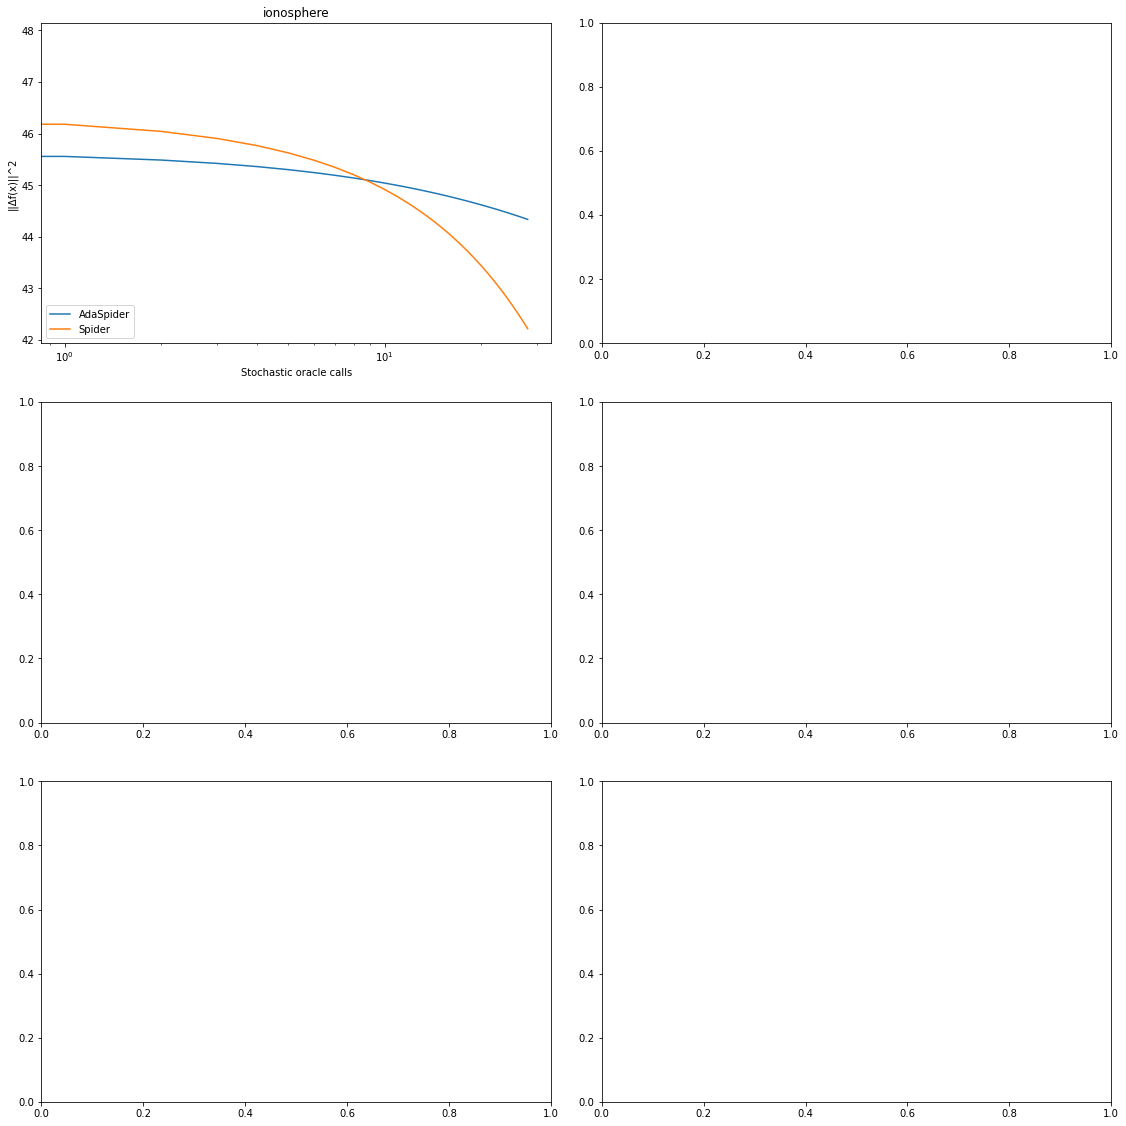

In [7]:
METHODS = ['AdaSpider', 'Spider']
ITERATIONS = 10000

def plot_data():
    # Write your code to make 4x4 panel here
    X_LABEL = "Stochastic oracle calls"
    Y_LABEL = "||\u0394f(x)||^2"

    fig, ax = plt.subplots(3,2,figsize=(16,16), sharey=False, sharex=False)

    for i, dataset_name in enumerate(DATASETS[::-1]):
        print(dataset_name)
        sbplt = ax[i%3, i%2]

        for method in METHODS:
            print(method)
            if method == "Spider":
                spider_params = SpiderParam(1, 5, 0.05)
                gradients = test_method(Spider, dataset_name, ITERATIONS, spider_params)
            else:
                gradients = test_method(ADASpider, dataset_name, ITERATIONS)
            gradients = [np.linalg.norm(grad, 2) for grad in gradients]
            sbplt.plot(gradients, label=method)

        sbplt.set_xscale('log')
        sbplt.set_title(dataset_name)
        sbplt.set_xlabel(X_LABEL)
        sbplt.set_ylabel(Y_LABEL)
        sbplt.legend(loc='lower left')

        break  # plot single dataset

    fig.tight_layout(pad=2.0)
    # fig.savefig('tests_logistic_regression.jpg', dpi=150)

plot_data()

In [12]:
# METHODS = ['AdaSpider', 'Spider']
# ITERATIONS = 100
#
# def plot_data():
#     # Write your code to make 4x4 panel here
#     X_LABEL = "Stochastic oracle calls"
#     Y_LABEL = "||\u0394f(x)||^2"
#
#     fig, ax = plt.subplots(3,2,figsize=(16,16), sharey=False, sharex=False)
#
#     for i, dataset_name in enumerate(DATASETS):
#         sbplt = ax[i%3, i%2]
#         print(dataset_name)
#         for method in METHODS:
#             if method == "Spider":
#                 spider_params = SpiderParam(100, 5, 0.05)
#                 gradients = test_method(Spider, dataset_name, ITERATIONS, spider_params)
#             else:
#                 gradients = test_method(ADASpider, dataset_name, ITERATIONS)
#             gradients = [np.linalg.norm(grad, 2) for grad in gradients]
#             sbplt.plot(gradients, label=method)
#
#         sbplt.set_xscale('log')
#         sbplt.set_title(dataset_name)
#         sbplt.set_xlabel(X_LABEL)
#         sbplt.set_ylabel(Y_LABEL)
#         sbplt.legend(loc='lower left')
#
#         break  # plot single dataset
#
#     fig.tight_layout(pad=2.0)
#     # fig.savefig('tests_logistic_regression.jpg', dpi=150)
#
# plot_data()